In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head(7)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785


### unique함수

해당 열에서 고유한 값 추출

In [5]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [14]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
#2차원 배열
fish_input[:5]

#입력 데이터로 사용

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [21]:
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [23]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
train_input.shape

(119, 5)

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 데이터 표준화 (StandardScaler)

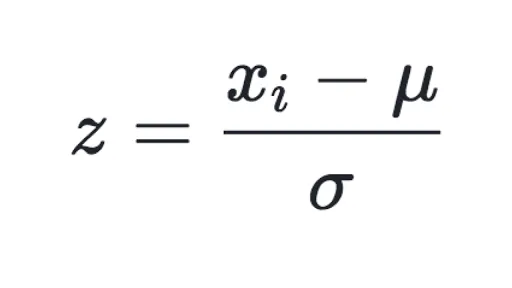

특성들의 평균을 0, 분산을 1로 스케일링 (특성들을 정규분포로 변환)

 - 특성의 최대값, 최소값을 제한하지 않음
 
 - 이상치에 민감
 
 - 회귀보단 분류에 적합

In [32]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
#최근접 이웃 k의 개수를 3으로 지정
kn.fit(train_scaled, train_target)
kn.score(train_scaled, train_target)

0.8907563025210085

In [31]:
kn.score(test_scaled, test_target)

0.85

In [41]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [42]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [38]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [45]:
distance, index = kn.kneighbors(test_scaled[3:4])
train_target[index]

array([['Roach', 'Perch', 'Perch']], dtype=object)

## 로지스틱 회귀

이름은 회귀이나 분류 모델

선형회귀와 동일하게 선형 방정식을 학습

식이 항상 0과 1의 범위에 넣기 위해 로지스틱 함수를 이용한다

z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f

a,b,c,d,e는 가중치 혹은 계수

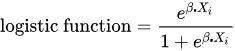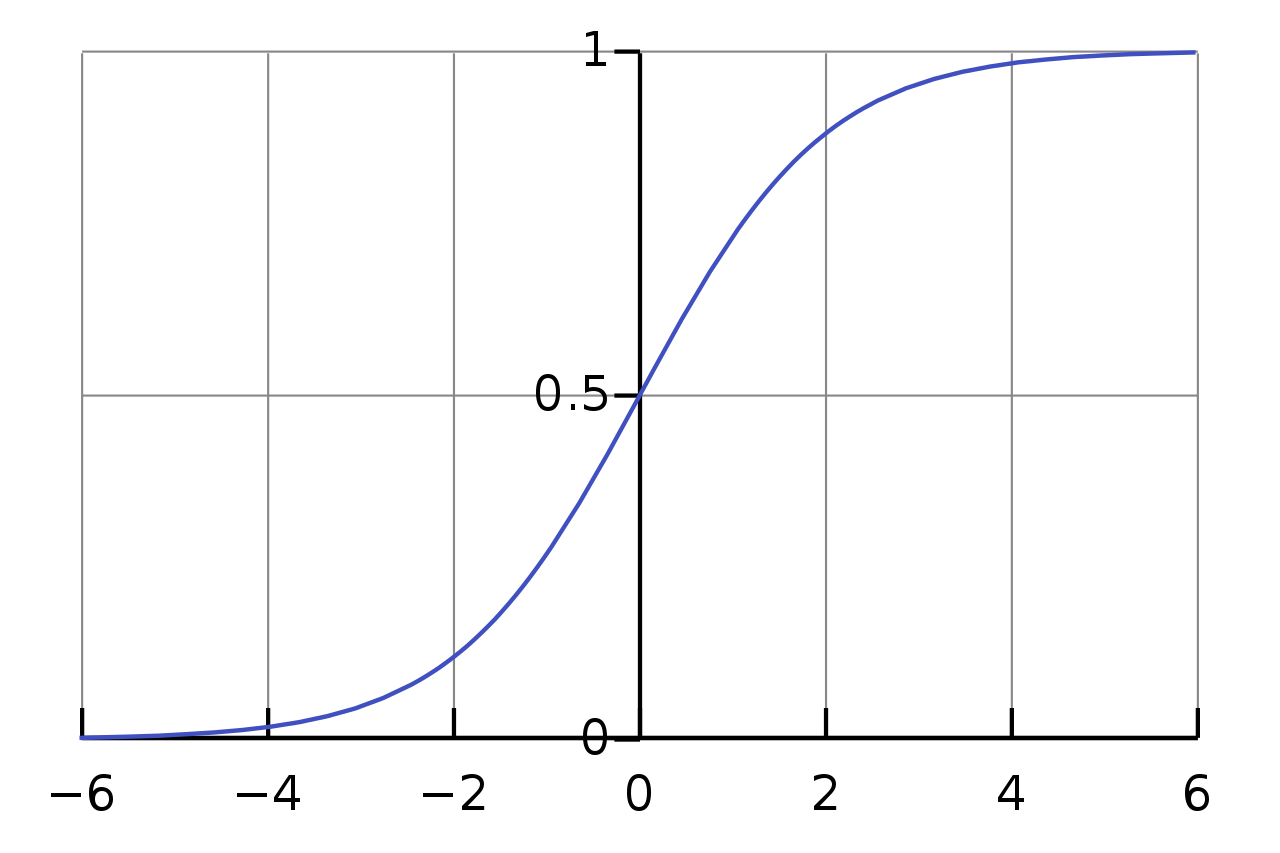

시그모이드 함수에서는 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값을 역수로 취한다

z가 큰 음수일 경우 0에 가까워지며, 큰 양수일 경우 1에 가까워진다. 0인 경우 0.5가 된다

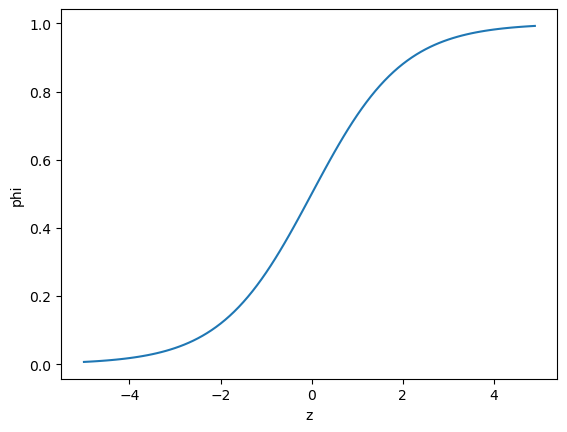

In [48]:
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
#z가 0.5보다 작으면 음수, 크면 양수로 판단

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [49]:
char_arr = np.array(['A', 'B','C', 'D', 'E'])
char_arr[[True, False, False, True, False]]

array(['A', 'D'], dtype='<U1')

In [51]:
bream_smelt_index = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_index]
target_bream_smelt = train_target[bream_smelt_index]

#도미와 빙어일 경우 True

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [57]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [58]:
lr.classes_
#smelt가 양성 클래스

array(['Bream', 'Smelt'], dtype=object)

In [59]:
lr.coef_

array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]])

In [61]:
lr.intercept_

#선형방정식 계수

array([-2.16155132])

In [63]:
decision = lr.decision_function(train_bream_smelt[:5])
decision

#처음 5개 샘플의 z값
#로지스틱 함수를 통해 확률 구할 수 있음

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [86]:
from scipy.special import expit

expit(decision)

array([[1.50324723e-03, 7.37287918e-01, 9.94309649e-01, 6.14011069e-02,
        9.65731563e-01, 5.80829034e-01, 3.46501819e-01],
       [1.92066914e-05, 8.72904913e-01, 9.91593777e-01, 8.34555970e-02,
        9.51564107e-01, 9.99606800e-01, 1.39342963e-02],
       [1.29265812e-02, 1.96044247e-03, 9.59850343e-01, 9.98480354e-01,
        9.13467425e-01, 9.18427326e-01, 2.03974998e-02],
       [3.35459001e-01, 6.11234013e-01, 9.33809322e-01, 2.34067463e-01,
        9.63180662e-01, 3.16379001e-03, 7.78758243e-01],
       [1.66322835e-03, 1.19951673e-01, 9.97027615e-01, 4.72780650e-01,
        9.70758894e-01, 4.72063368e-01, 3.30295197e-01]])

 - predict_proba 메서드 출력의 두번째 열과 값이 동일
 - predict_proba 메서드는 음성 / 양성 클래스에 대한 확률 출력
 - decision_function 메서드는 양성 클래스에 대한 z값을 계산
 - coef_, intercept_ 속성은 로지스틱 모델이 학습한 선형 방적식의 계수를 출력

In [67]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target)

0.9327731092436975

In [68]:
lr.score(test_scaled, test_target)

0.925

In [69]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [74]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals = 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [75]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [77]:
lr.coef_.shape

(7, 5)

In [78]:
lr.intercept_

array([-0.09220027, -0.26297954,  3.25070805, -0.14650445,  2.65466181,
       -6.78781452,  1.38412892])

In [84]:
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals = 2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

In [85]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])